<a href="https://colab.research.google.com/github/gyeowool/ai/blob/main/C)_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means

In [ ]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data=df[['Annual Income (k$)', 'Spending Score (1-100)']]

from sklearn.preprocessing import MinMaxScaler #거리 기반이므로 정규화를 하는 것이 좋다.
scaler=MinMaxScaler()
data=scaler.fit_transform(data)

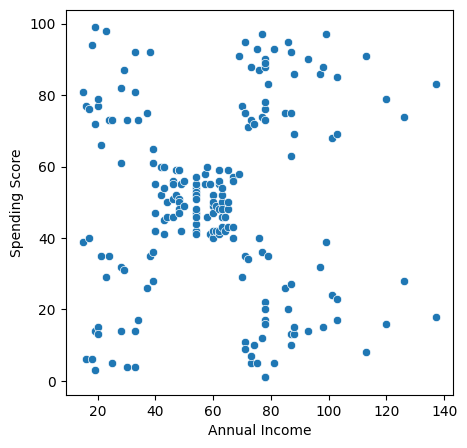

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5) #n_clusters에 군집 개수 설정
df['cluster']=km.fit_predict(data)
#위 문장은 다음 두 문장을 실행하는 것과 같음
#km.fit(data) #데이터를 세 개의 군집으로 군집화하기 위한 패턴을 찾아냄
#df['cluster']=km.predict(data) #찾아낸 패턴에 따라 데이터별로 해당되는 군집을 구함.

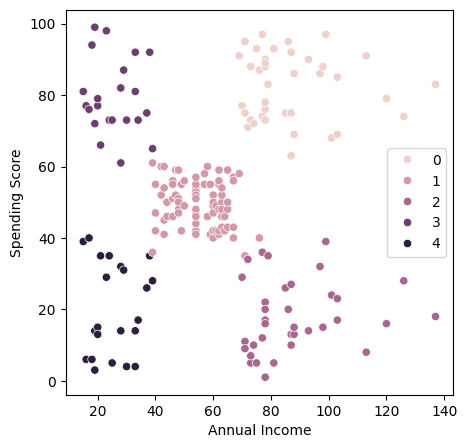

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue='cluster')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

##엘보우 분석

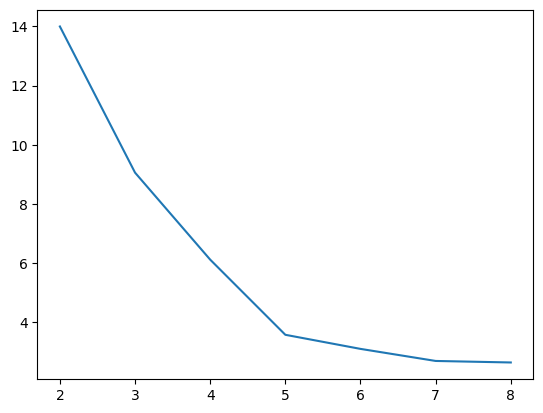

In [ ]:
import matplotlib.pyplot as plt
inertia=[]
for i in range(2, 9):
  km=KMeans(n_clusters=i) #군집 개수를 i로 하는 k-means 모델 km 생성
  km.fit(data) #data로 km 학습시키기
  inertia.append(km.inertia_) #inertia 리스트에 km 모델의 inertia_ 속성값 추가하기
plt.plot(range(2,9),inertia)

위 그래프에서 최적의 군집 수는 몇일까요?

##실루엣 분석

k=3일 때 실루엣 계수 평균: 0.4461
k=4일 때 실루엣 계수 평균: 0.4972
k=5일 때 실루엣 계수 평균: 0.5602


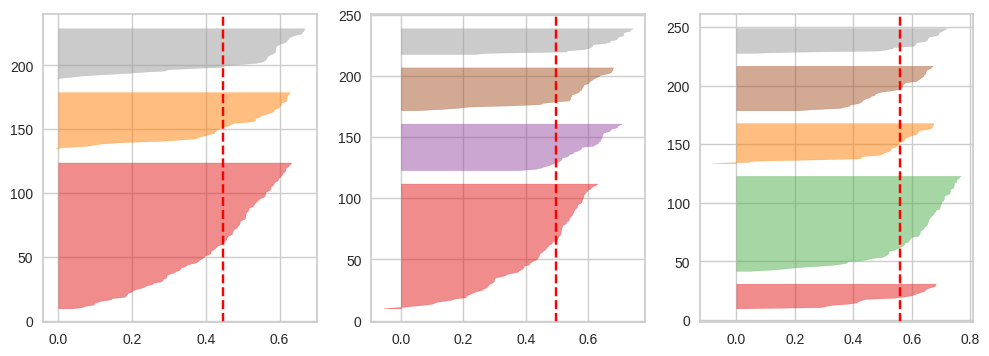

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
fig,ax=plt.subplots(1,3, figsize=(12,4))

for k in range(3,6):
  model = KMeans(n_clusters=k)
  vis = SilhouetteVisualizer(model, ax=ax[k-3])
  vis.fit(data)
  print(f'k={k}일 때 실루엣 계수 평균: {vis.silhouette_samples_.mean():.4f}')

plt.show()

# 실습1) 붓꽃 데이터에 대해 k-means 군집화를 수행하고, 실제 붓꽃 종과 일치하게 군집화 했는지 확인해 봅시다.

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
data2=iris.data
df2=pd.DataFrame(data2, columns=iris.feature_names)
df2['target']=iris.target
df2.head()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.1, min_samples=10)
df['cluster_db']=db.fit_predict(data)

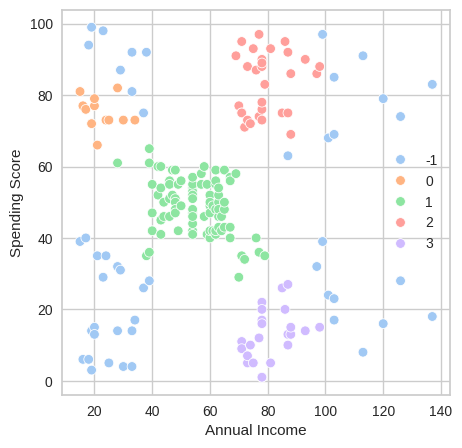

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df, hue='cluster_db', palette='pastel')
plt.legend()
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
# 모든 데이터들 실루엣 계수값들의 평균 계수값 출력
average_coef = silhouette_score(data, df['cluster_db'])
print(f'평균 실루엣 계수값: {average_coef:.4f}')

# 실습2) mall customers에 대해 min_samples 값을 5~10까지 바꾸어 DBSCAN 군집화를 수행하고, 실루엣 계수를 출력하시오. (반복문 사용)